In [5]:

import pandas as pd
from ydata_profiling import ProfileReport
#from pydantic import v1 as pydantic_v
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('red_wine.csv')

# Generate a pandas profiling report
profile = ProfileReport(data)

# Save the profiling report to an HTML file
profile.to_file("red_wine_data_profiling_report.html")

# Display a summary of the DataFrame
#print(data.info())

# Optionally, you can also display the first few rows of the DataFrame
#print(data.head())


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Encode the 'type' column (high or low) to numerical values
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Separate features and target variable
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

# Define models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Perform 10-fold cross-validation and report accuracy and AUC
for model_name, model in models.items():
    accuracies = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    aucs = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    print(f'{model_name}: Mean Accuracy: {accuracies.mean():.2f}')
    print(f'{model_name}: Mean AUC: {aucs.mean():.2f}')


Baseline: Mean Accuracy: 0.53
Baseline: Mean AUC: 0.50
Logistic Regression: Mean Accuracy: 0.78
Logistic Regression: Mean AUC: 0.88
Naive Bayes: Mean Accuracy: 0.82
Naive Bayes: Mean AUC: 0.90
Decision Tree: Mean Accuracy: 0.76
Decision Tree: Mean AUC: 0.74
SVM-Linear: Mean Accuracy: 0.79
SVM-Linear: Mean AUC: 0.88
SVM-RBF: Mean Accuracy: 0.54
SVM-RBF: Mean AUC: 0.87
Random Forest: Mean Accuracy: 0.80
Random Forest: Mean AUC: 0.89


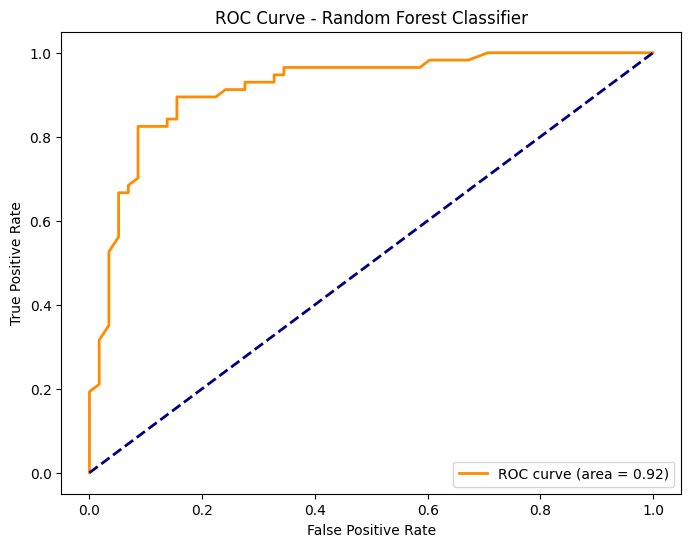

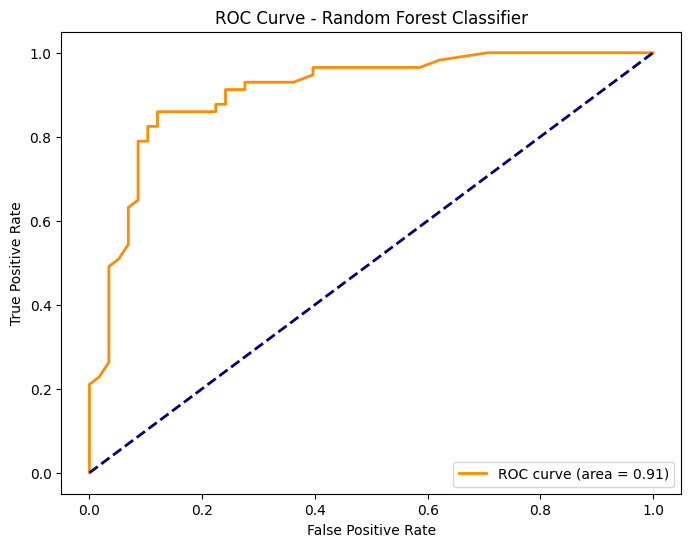

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Encode the 'type' column (high or low) to numerical values
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Separate features and target variable
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

%matplotlib inline

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the white-wine dataset
white_wine_data = pd.read_csv('white_wine.csv')

# Assuming you identified Random Forest as the best model
# Encode the 'type' column (high or low) to numerical values
label_encoder = LabelEncoder()
white_wine_data['type'] = label_encoder.fit_transform(white_wine_data['type'])

# Separate features and target variable for white-wine dataset
X_white_wine = white_wine_data[['citric acid', 'sulphates', 'alcohol']]
y_white_wine = white_wine_data['type']

# Initialize Random Forest classifier (or use the best model identified)
rf_classifier = RandomForestClassifier()

# Train the classifier on the red-wine dataset (assuming this is the best model)
rf_classifier.fit(X, y)

# Predict probabilities for the positive class on white-wine dataset
y_scores_white_wine = rf_classifier.predict_proba(X_white_wine)[:, 1]

# Calculate AUC score for white-wine dataset
auc_score_white_wine = roc_auc_score(y_white_wine, y_scores_white_wine)

print(f'AUC Score on white-wine dataset: {auc_score_white_wine:.2f}')


AUC Score on white-wine dataset: 0.98
